In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from scipy.stats import mode

In [92]:
data = pd.read_csv('train.csv') #Carregamento DF original

# Análise exploratória

# Informações dos dados

In [93]:
#Deletando a coluna ID
data = data.drop('Id', axis=1)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [95]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Verificando valores faltantes

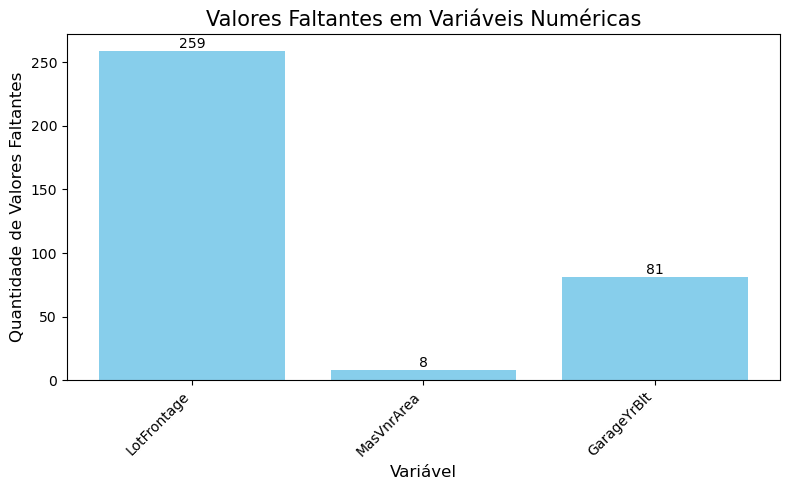

In [96]:
# Selecionar apenas as colunas numéricas
numeric_cols = data.select_dtypes(include='number').columns

# Calcular a quantidade de valores faltantes em cada coluna numérica
missing_values = data[numeric_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(missing_values.index, missing_values.values, color='skyblue')

# Configurar os rótulos do eixo x e y, e o título do gráfico
ax.set_xlabel('Variável', fontsize=12)
ax.set_ylabel('Quantidade de Valores Faltantes', fontsize=12)
ax.set_title('Valores Faltantes em Variáveis Numéricas', fontsize=15)

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar os valores exatos no topo das barras
for i, value in enumerate(missing_values.values):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

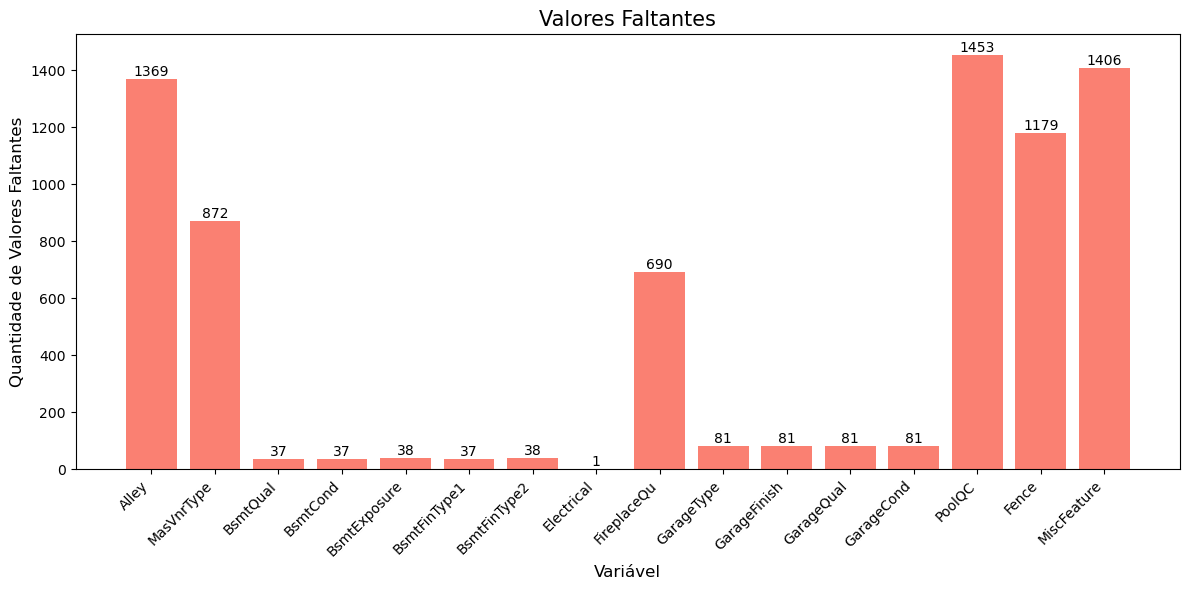

In [97]:
# Selecionar apenas as colunas categóricas (objetos)
object_cols = data.select_dtypes(include='object').columns

# Calcular a quantidade de valores faltantes em cada coluna categórica
missing_values = data[object_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(missing_values.index, missing_values.values, color='salmon')

# Configurar os rótulos do eixo x e y, e o título do gráfico
ax.set_xlabel('Variável', fontsize=12)
ax.set_ylabel('Quantidade de Valores Faltantes', fontsize=12)
ax.set_title('Valores Faltantes', fontsize=15)

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar os valores exatos no topo das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

# Verificando correlações com a coluna 'SalePrice'

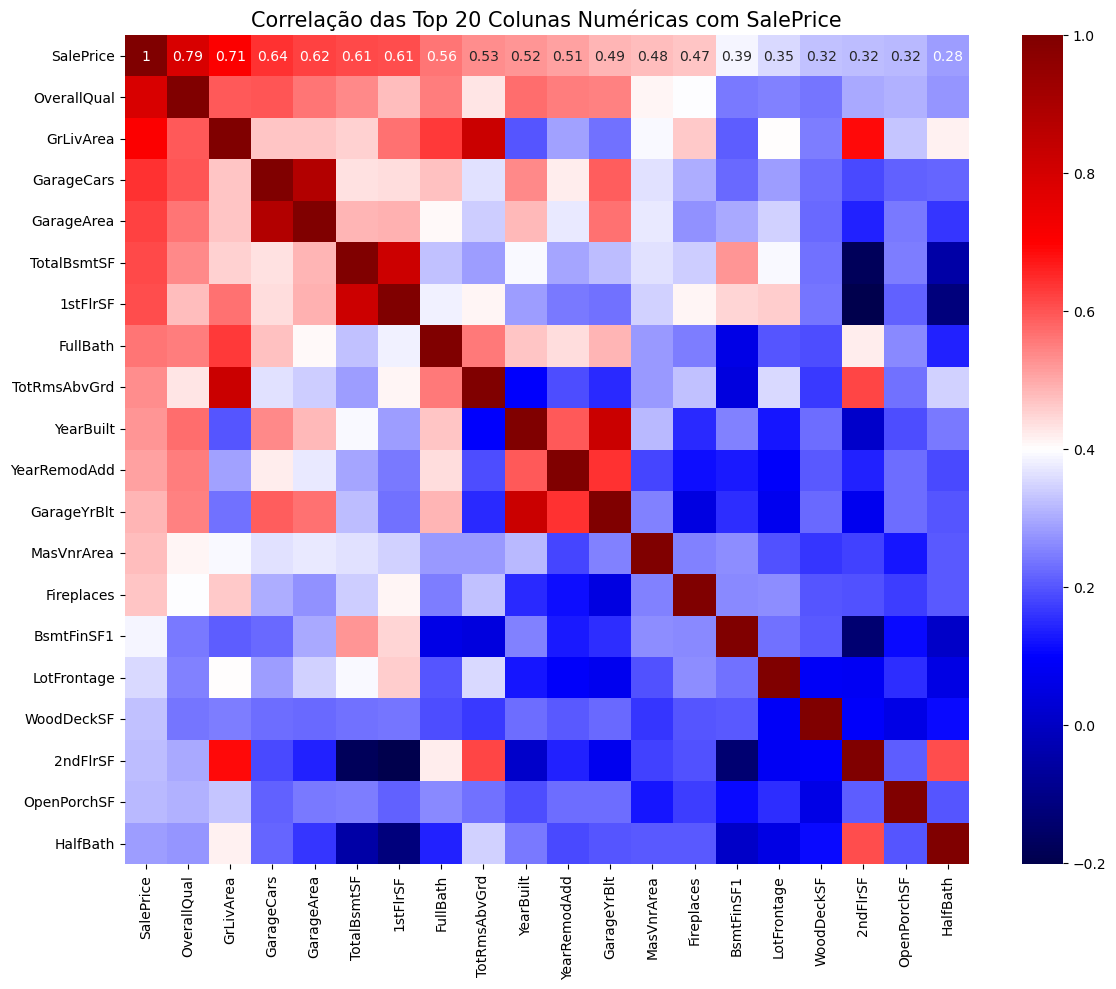

In [98]:
# Selecionar as colunas numéricas
numeric_columns = data.select_dtypes(include='number')

# Calcular a matriz de correlação
corr_matrix_numeric = numeric_columns.corr()

# Selecionar as 20 maiores correlações com a coluna "SalePrice"
top_corr_numeric = corr_matrix_numeric['SalePrice'].sort_values(ascending=False).head(20)

# Filtrar a matriz de correlação com as colunas selecionadas
corr_matrix_top_numeric = numeric_columns[top_corr_numeric.index].corr()

# Criar a figura e os eixos para o mapa de calor
fig, ax = plt.subplots(figsize=(12, 10))

# Criar o mapa de calor
heatmap = sns.heatmap(corr_matrix_top_numeric, annot=True, cmap='seismic', ax=ax)

# Configurar o título do gráfico
ax.set_title('Correlação das Top 20 Colunas Numéricas com SalePrice', fontsize=15)

# Ajustar layout para evitar sobreposições
plt.tight_layout()

# Exibir o gráfico
plt.show()

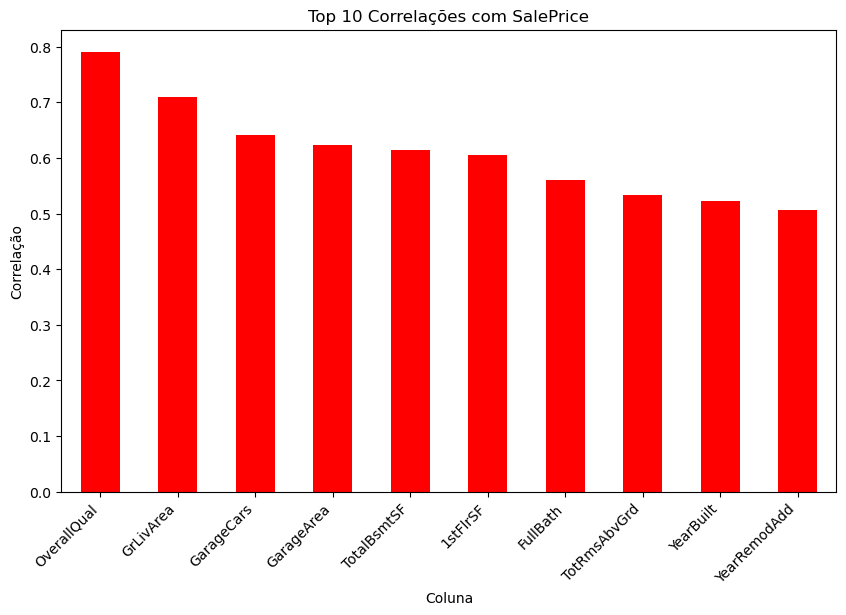

In [99]:
# Selecionar apenas as colunas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_data.corr()

# Selecionar as 10 maiores correlações com 'SalePrice'
top_corr = correlation_matrix['SalePrice'].nlargest(11)[1:]

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
top_corr.plot(kind='bar', color='red')
plt.title('Top 10 Correlações com SalePrice')
plt.xlabel('Coluna')
plt.ylabel('Correlação')
plt.xticks(rotation=45, ha='right')
plt.show()

# Verificando outliers

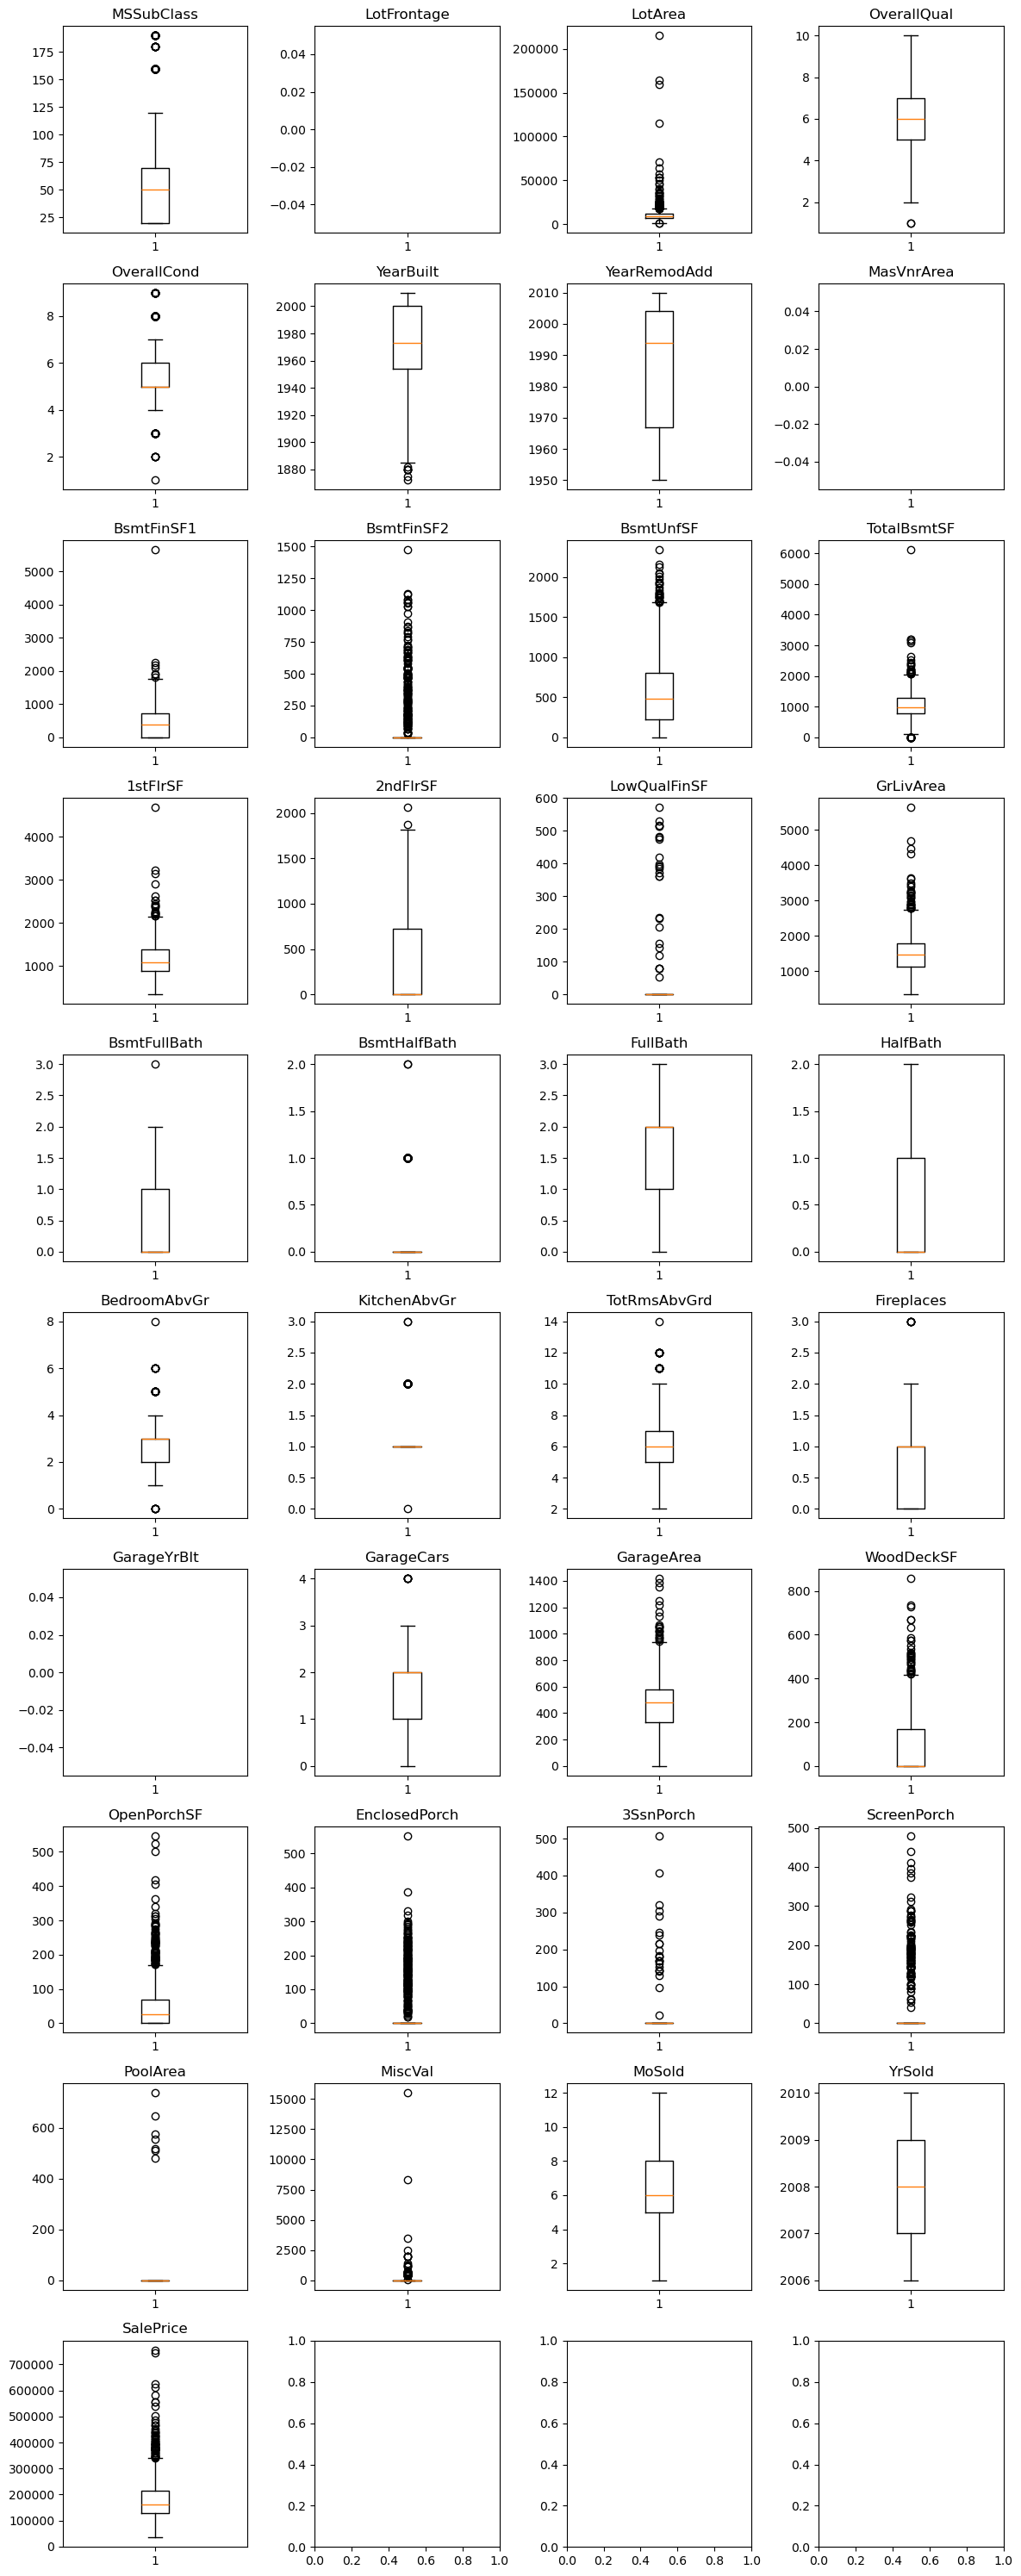

In [100]:
# Identificar as colunas numéricas para análise
colunas_numericas = data.select_dtypes(include='number').columns

# Calcular as dimensões da matriz de subplots
num_cols = len(colunas_numericas)
num_rows = (num_cols - 1) // 4 + 1

# Criar a matriz de subplots
fig, axs = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))

# Gerar gráficos boxplot para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    ax.boxplot(data[coluna])
    ax.set_title(coluna)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

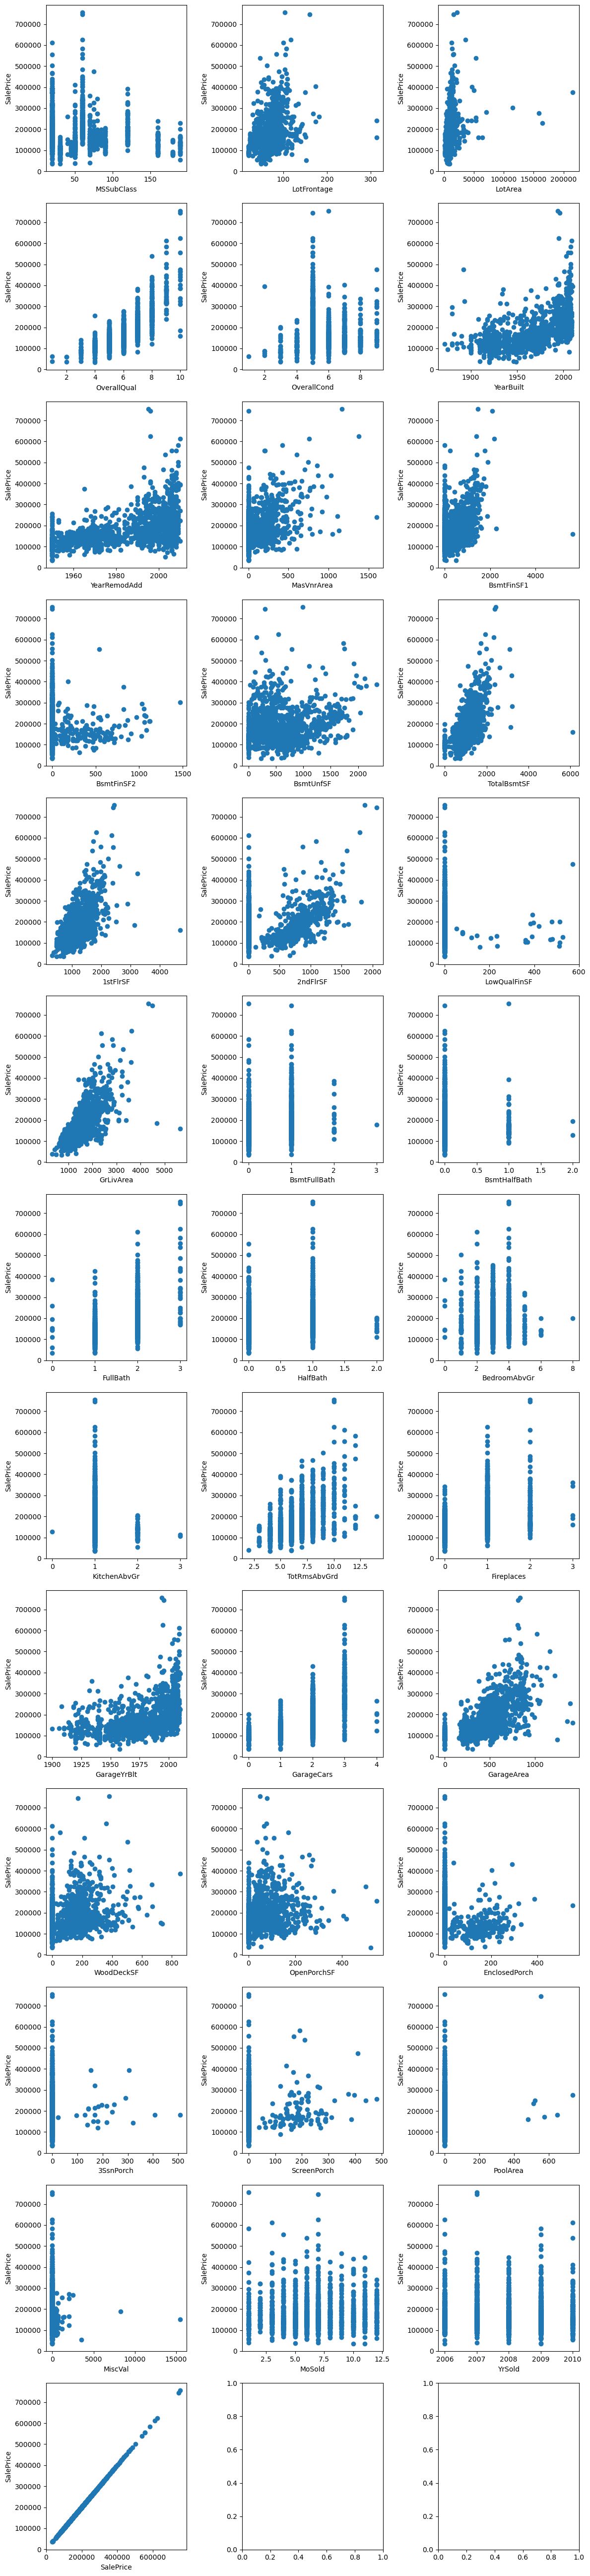

In [101]:
# Identificar as colunas numéricas para análise
colunas_numericas = data.select_dtypes(include='number').columns

# Calcular as dimensões da matriz de subplots
num_cols = len(colunas_numericas)
num_rows = (num_cols - 1) // 3 + 1

# Criar a matriz de subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

# Gerar gráficos de dispersão para cada coluna numérica em relação à coluna 'SalePrice'
for i, coluna in enumerate(colunas_numericas):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.scatter(data[coluna], data['SalePrice'])
    ax.set_xlabel(coluna)
    ax.set_ylabel('SalePrice')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [102]:
colunas_numericas = data.select_dtypes(include='number').columns

# Verificar as colunas com possíveis distorções
colunas_distorcidas = []
for coluna in colunas_numericas:
    # Verificar se existem outliers
    limite_inferior = data[coluna].mean() - 3 * data[coluna].std()
    limite_superior = data[coluna].mean() + 3 * data[coluna].std()
    outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]
    
    # Verificar a assimetria da distribuição
    assimetria = data[coluna].skew()
    
    # Verificar se a coluna está distorcida
    if len(outliers) > 0 or abs(assimetria) > 1:
        colunas_distorcidas.append(coluna)

# Exibir as colunas com possíveis distorções
print("Colunas com possíveis distorções:")
for coluna in colunas_distorcidas:
    print(coluna)

Colunas com possíveis distorções:
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice


# Feature engineering

# Remoção de Outliers

In [103]:
# Calcular estatísticas do SalePrice
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers
data_filtered = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]

# Verificar o número de registros remanescentes
num_records_filtered = data_filtered.shape[0]
num_records_total = data.shape[0]
num_outliers_removed = num_records_total - num_records_filtered

# Imprimir informações
print(f"Número de outliers removidos: {num_outliers_removed}")
print(f"Número de registros remanescentes: {num_records_filtered}")
data_filtered

Número de outliers removidos: 61
Número de registros remanescentes: 1399


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Visualizando distribuição dos dados númericos

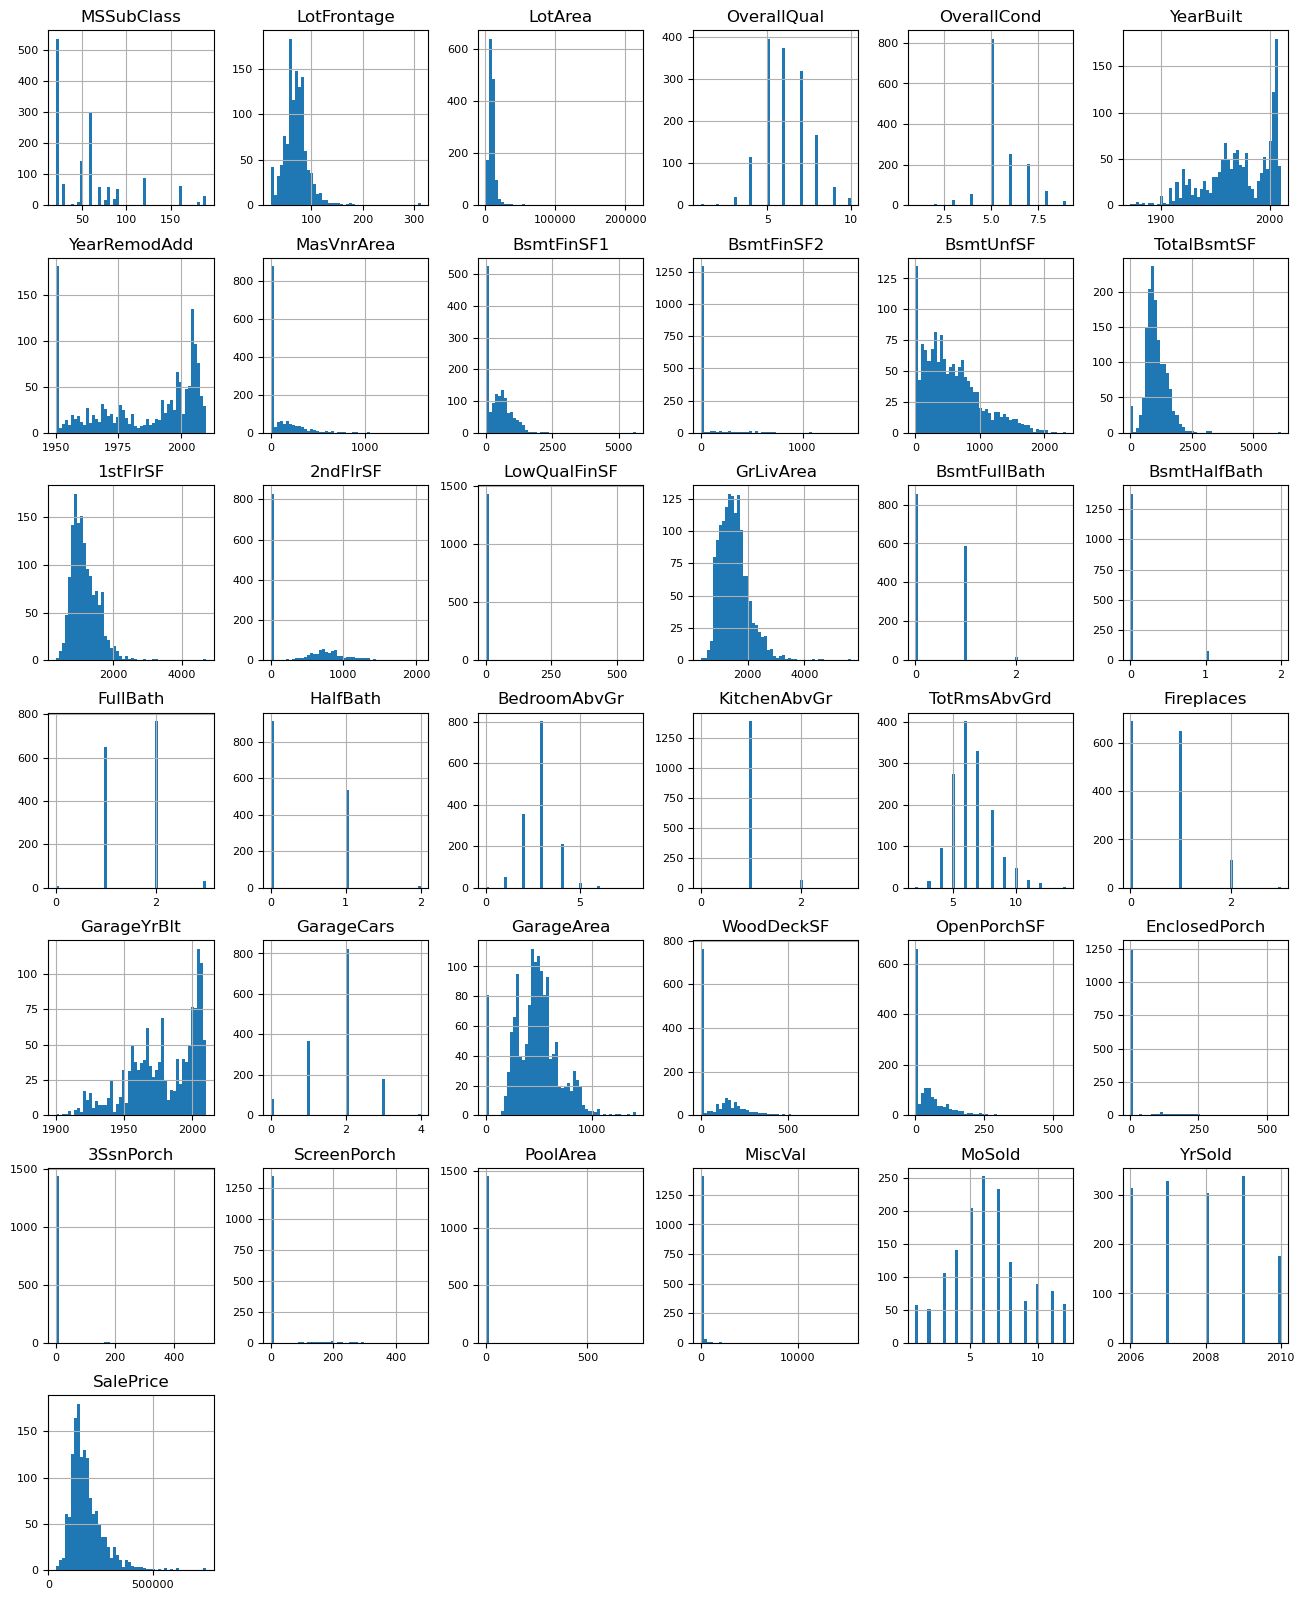

In [104]:
colunas_numericas = data.select_dtypes(include = ['float64', 'int64'])
colunas_numericas.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Removendo colunas com muitos dados faltantes

In [105]:
# Remoção colunas 
colunas_remover = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
data = data.drop(colunas_remover, axis=1)

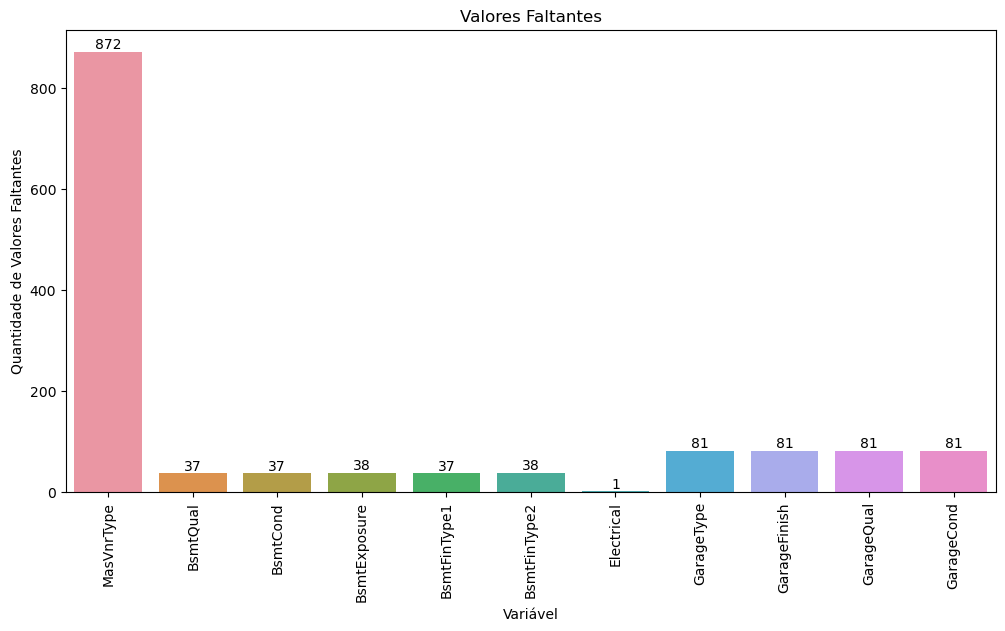

In [106]:
# Selecionar apenas as colunas categóricas (objetos)
object_cols = data.select_dtypes(include='object').columns

# Calcular a quantidade de valores faltantes em cada coluna categórica
missing_values = data[object_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes')

# Adicionar a legenda com os valores exatos
for i, value in enumerate(missing_values.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

# Preenchendo dados faltantes

In [107]:
# Preenchendo dados das colunas númericas

# Identificar as colunas inteiras com dados faltantes
colunas_inteiras = data.select_dtypes(include=['int']).columns
colunas_inteiras_faltantes = data[colunas_inteiras].isnull().any()

# Identificar as colunas float com dados faltantes
colunas_float = data.select_dtypes(include=['float']).columns
colunas_float_faltantes = data[colunas_float].isnull().any()

# Preencher colunas inteiras com a média
data[colunas_inteiras] = data[colunas_inteiras].fillna(data[colunas_inteiras].mean())

# Preencher colunas float com a média
data[colunas_float] = data[colunas_float].fillna(data[colunas_float].mean())

In [108]:
# Preenchendo dados das colunas objetos

data['MSZoning'].fillna('RL', inplace=True)
data['Utilities'].fillna('AllPub', inplace=True)
data['MasVnrType'].fillna('None', inplace=True)
data['BsmtQual'].fillna('TA', inplace=True)
data['BsmtCond'].fillna('No', inplace=True)
data['BsmtExposure'].fillna('GLQ', inplace=True)
data['BsmtFinType1'].fillna('Unf', inplace=True)
data['BsmtFinType2'].fillna('Unf', inplace=True)
data['KitchenQual'].fillna('TA', inplace=True)
data['Functional'].fillna('Min2', inplace=True)
data['GarageType'].fillna('Attchd', inplace=True)
data['GarageFinish'].fillna('Unf', inplace=True)
data['GarageQual'].fillna('TA', inplace=True)
data['GarageCond'].fillna('TA', inplace=True)
data['SaleType'].fillna('WD', inplace=True)
data['Electrical'].fillna('SBrkr', inplace=True)

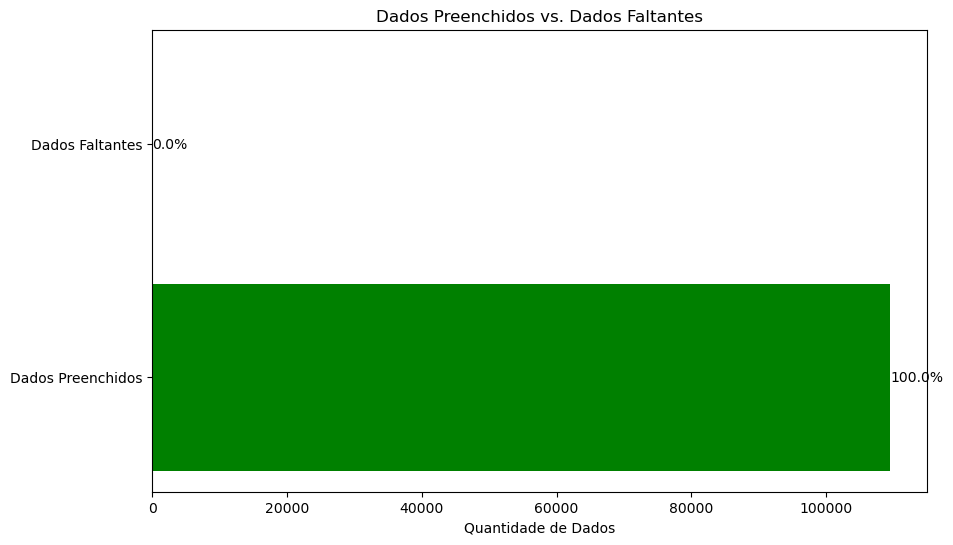

In [131]:
# Calcular a quantidade total de dados
total_data = data.size

# Calcular a quantidade de campos preenchidos
filled_data = data.count().sum()

# Calcular a quantidade de campos vazios
missing_data = total_data - filled_data

# Criar lista de rótulos para o gráfico de barras
labels = ['Dados Preenchidos', 'Dados Faltantes']

# Criar lista de valores para o gráfico de barras
values = [filled_data, missing_data]

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color=['green', 'red'])
plt.xlabel('Quantidade de Dados')
plt.title('Dados Preenchidos vs. Dados Faltantes')

# Adicionar porcentagens nas barras
for index, value in enumerate(values):
    plt.text(value, index, f'{(value/total_data)*100:.1f}%', va='center')

plt.show()

# Aprendizagem Supervisionada

# a) Regressão Linear

In [110]:
# Crie uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Itere sobre as colunas com objetos e aplique o Label Encoder
for col in data.select_dtypes(include='object'):
    data[col] = label_encoder.fit_transform(data[col])

# Verifique as colunas transformadas
print(data.head())


   MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0  

In [111]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir as métricas de avaliação
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 21665.59624730969
Root Mean Squared Error (RMSE): 34367.66110143083
R-squared (R2): 0.846012268881593


# b) Classificação

In [112]:
# Definir um limite de preço para classificação (exemplo: 200.000)
limite_preco = 200000

# Criar a variável de saída binária
y_class = np.where(data['SalePrice'] > limite_preco, 1, 0)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Criar o modelo de classificação (por exemplo, Logistic Regression)
model = LogisticRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir as métricas de avaliação
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("---------------")

for idx, pred in enumerate(y_pred):
    if idx >= 10:
        break
    if pred == 1:
        print(f"Casa {idx} foi vendida por um preço alto")
    else:
        print(f"Casa {idx} foi vendida por um preço baixo")




Accuracy: 0.9041095890410958
Precision: 0.9090909090909091
Recall: 0.7317073170731707
---------------
Casa 0 foi vendida por um preço baixo
Casa 1 foi vendida por um preço alto
Casa 2 foi vendida por um preço baixo
Casa 3 foi vendida por um preço baixo
Casa 4 foi vendida por um preço alto
Casa 5 foi vendida por um preço baixo
Casa 6 foi vendida por um preço baixo
Casa 7 foi vendida por um preço baixo
Casa 8 foi vendida por um preço baixo
Casa 9 foi vendida por um preço baixo


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Aprendizagem não Supervisionada

# b) Redução de dimensionalidade

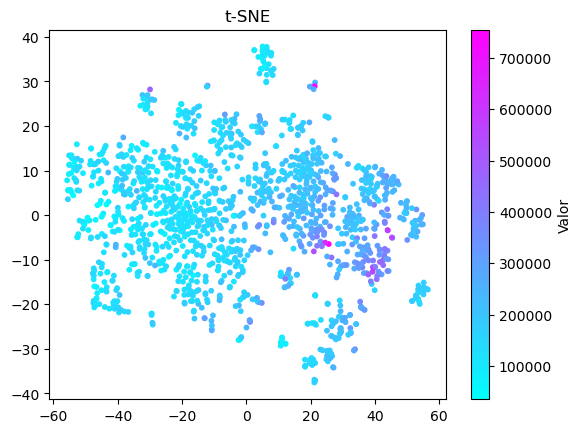

In [113]:
# Carregar o conjunto de dados
caracteristicas = data.drop('SalePrice', axis=1)
valores = data['SalePrice']

X, y = caracteristicas, valores
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Definir o modelo e ajustá-lo aos dados
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_norm)

# Plotar os resultados
plt.scatter(X_tsne[:, 0], X_tsne[:, 1] , c=y, s=10, cmap='cool')  # Alterei a paleta de cores para 'plasma'
plt.colorbar(label='Valor')
plt.title('t-SNE')
plt.show()

# Visualização de resultados

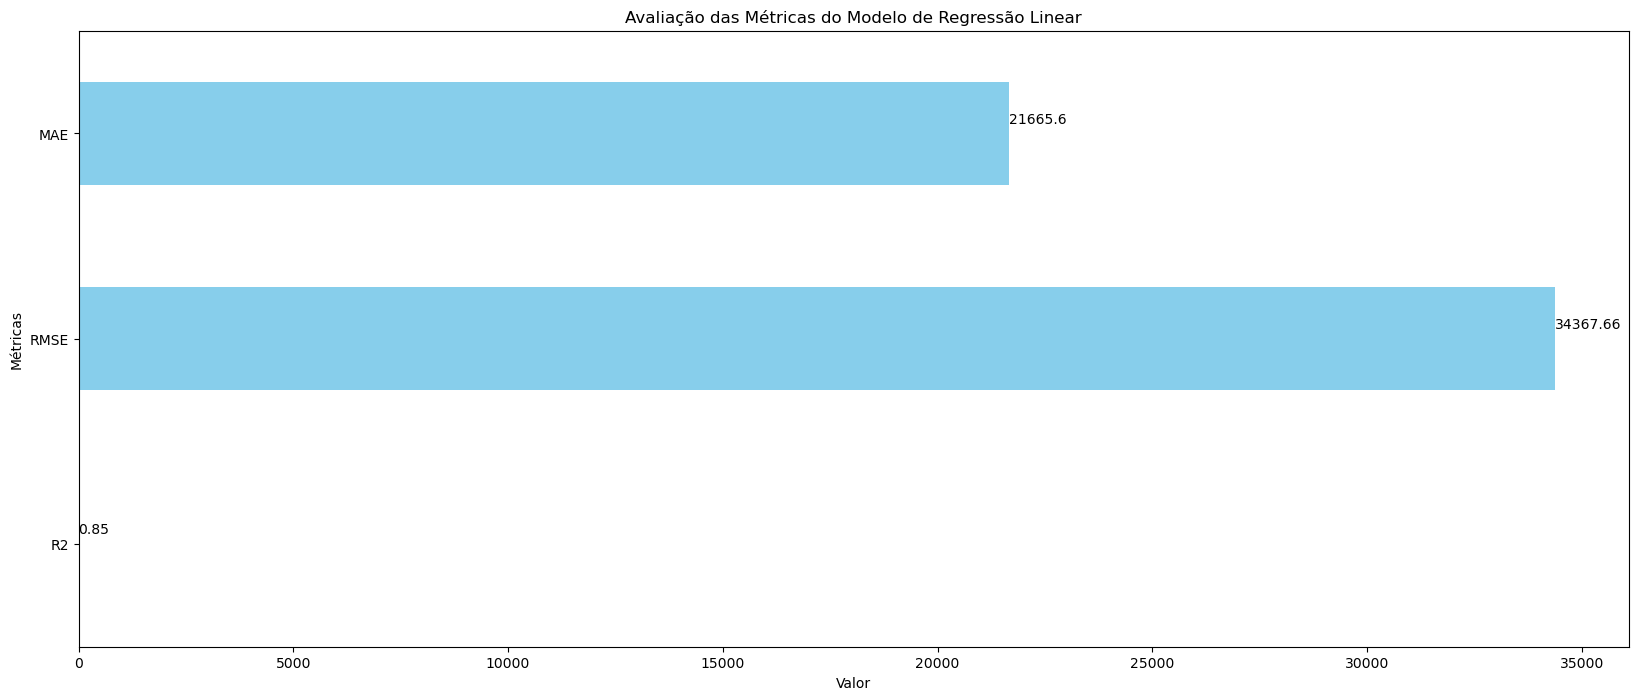

In [114]:
# Definir as métricas de avaliação
metrics = ['MAE', 'RMSE', 'R2']
values = [mae, rmse, r2]

# Criar um DataFrame a partir das métricas e valores
df = pd.DataFrame(values, index=metrics, columns=['Value'])

# Criar um gráfico de barras horizontal
ax = df.plot(kind='barh', legend=False, figsize=(20, 8), color='skyblue')

# Inverter o eixo y
ax.invert_yaxis()

# Adicionar o valor dos dados a cada barra
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.2, str(round(i.get_width(), 2)), fontsize=10)

# Configurar as características do gráfico
plt.xlabel('Valor')
plt.ylabel('Métricas')
plt.title('Avaliação das Métricas do Modelo de Regressão Linear')

# Exibir o gráfico
plt.show()


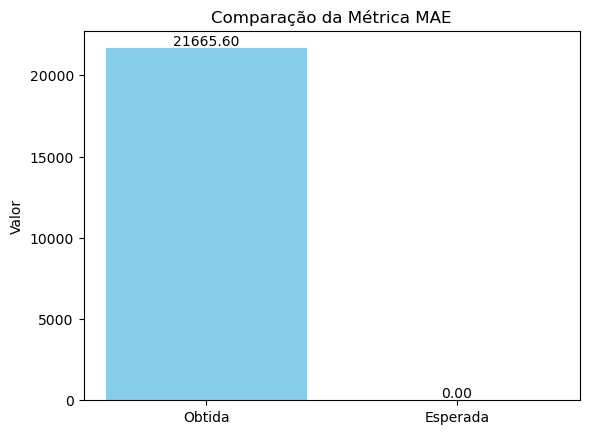

In [115]:
perfect_mae = 0  # Defina o valor esperado aqui

# Estabelecer os valores obtidos e esperados
mae_obtida = mae
mae_esperada = perfect_mae

# Construir o gráfico de barras
figura, eixo = plt.subplots()
eixo.bar(['Obtida', 'Esperada'], [mae_obtida, mae_esperada], color=['skyblue', 'purple'])

# Adicionar os valores no topo das barras
eixo.text(0, mae_obtida, f'{mae_obtida:.2f}', ha='center', va='bottom', color='black')
eixo.text(1, mae_esperada, f'{mae_esperada:.2f}', ha='center', va='bottom', color='black')

# Definir os títulos e rótulos do gráfico
eixo.set_title('Comparação da Métrica MAE')
eixo.set_ylabel('Valor')
plt.show()


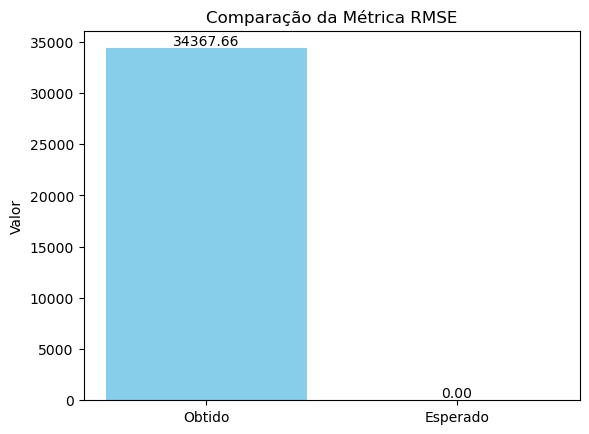

In [116]:
# Definir os valores obtidos e esperados
obtido_rmse = rmse
esperado_rmse = 0

# Criar o gráfico de barras
fig, ax = plt.subplots()
ax.bar(['Obtido', 'Esperado'], [obtido_rmse, esperado_rmse], color=['skyblue', 'purple'])

# Adicionar os valores no topo das barras
ax.text(0, obtido_rmse, f'{obtido_rmse:.2f}', ha='center', va='bottom', color='black')
ax.text(1, esperado_rmse, f'{esperado_rmse:.2f}', ha='center', va='bottom', color='black')

# Definir os títulos e rótulos do gráfico
ax.set_title('Comparação da Métrica RMSE')
ax.set_ylabel('Valor')
plt.show()

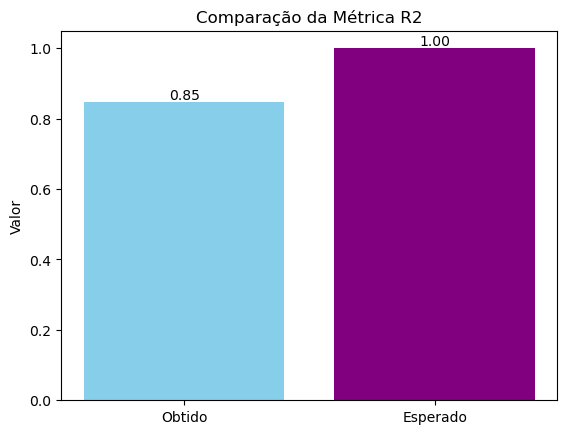

In [117]:
# Definir os valores obtidos e esperados
obtido_r2 = r2
esperado_r2 = 1

# Criar o gráfico de barras
fig, ax = plt.subplots()
ax.bar(['Obtido', 'Esperado'], [obtido_r2, esperado_r2], color=['skyblue', 'purple'])

# Adicionar os valores no topo das barras
ax.text(0, obtido_r2, f'{obtido_r2:.2f}', ha='center', va='bottom', color='black')
ax.text(1, esperado_r2, f'{esperado_r2:.2f}', ha='center', va='bottom', color='black')

# Definir os títulos e rótulos do gráfico
ax.set_title('Comparação da Métrica R2')
ax.set_ylabel('Valor')
plt.show()

As métricas de regressão apresentaram os seguintes resultados:

Erro Médio Absoluto (MAE): 21665.596
Raiz do Erro Quadrático Médio (RMSE): 34367.661
Coeficiente de Determinação (R2): 0.846

A análise das métricas de regressão revela que o modelo possui um erro absoluto médio de cerca de 21,665 em comparação com os valores reais de venda. O RMSE, que reflete a dispersão dos erros, é aproximadamente 34,367. O coeficiente de determinação, R2, é 0.846, indicando que cerca de 84.6% da variabilidade dos dados é explicada pelo modelo. De maneira geral, o modelo demonstra um bom desempenho, mas é crucial levar em conta o contexto e as necessidades específicas do problema para uma interpretação correta dos resultados.

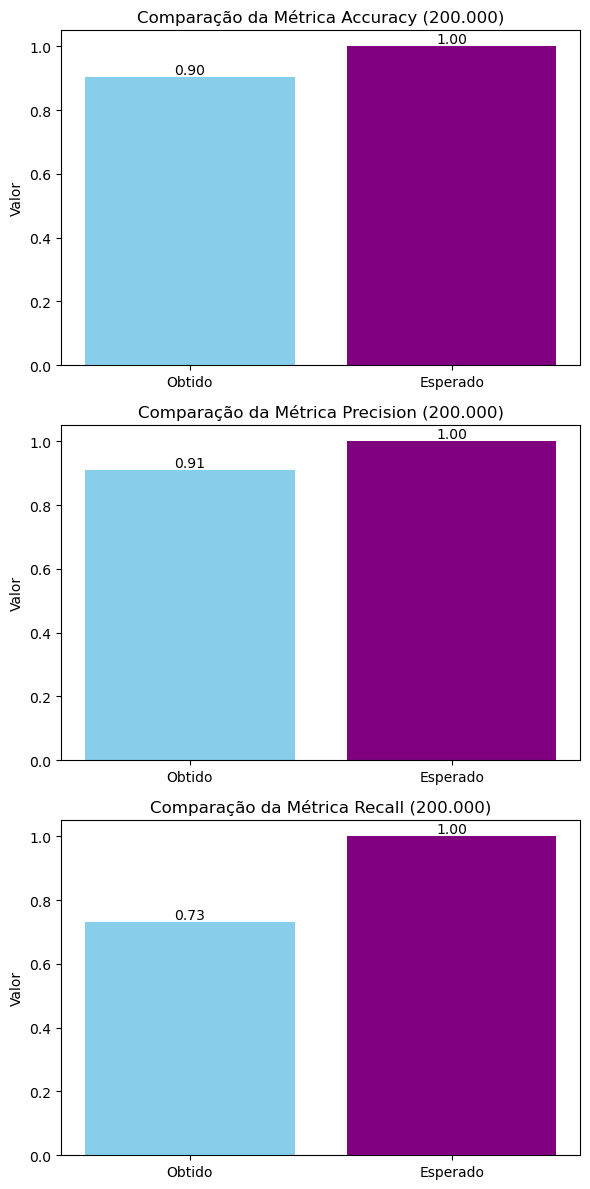

In [118]:
# Definir os valores obtidos
obtido_accuracy = accuracy
obtido_precision = precision
obtido_recall = recall

# Definir os valores esperados manualmente
expected_accuracy = 1.00
expected_precision = 1.00
expected_recall = 1.00

# Criar os gráficos individuais
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 12))

# Gráfico para a métrica Accuracy
ax1.bar(['Obtido', 'Esperado'], [obtido_accuracy, expected_accuracy], color=['skyblue', 'purple'])
ax1.text(0, obtido_accuracy, f'{obtido_accuracy:.2f}', ha='center', va='bottom', color='black')
ax1.text(1, expected_accuracy, f'{expected_accuracy:.2f}', ha='center', va='bottom', color='black')
ax1.set_title('Comparação da Métrica Accuracy (200.000)')
ax1.set_ylabel('Valor')

# Gráfico para a métrica Precision
ax2.bar(['Obtido', 'Esperado'], [obtido_precision, expected_precision], color=['skyblue', 'purple'])
ax2.text(0, obtido_precision, f'{obtido_precision:.2f}', ha='center', va='bottom', color='black')
ax2.text(1, expected_precision, f'{expected_precision:.2f}', ha='center', va='bottom', color='black')
ax2.set_title('Comparação da Métrica Precision (200.000)')
ax2.set_ylabel('Valor')

# Gráfico para a métrica Recall
ax3.bar(['Obtido', 'Esperado'], [obtido_recall, expected_recall], color=['skyblue', 'purple'])
ax3.text(0, obtido_recall, f'{obtido_recall:.2f}', ha='center', va='bottom', color='black')
ax3.text(1, expected_recall, f'{expected_recall:.2f}', ha='center', va='bottom', color='black')
ax3.set_title('Comparação da Métrica Recall (200.000)')
ax3.set_ylabel('Valor')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

Os resultados alcançados apontam para um excelente desempenho do **modelo de classificação**. Com uma acurácia de 99.3%, o modelo consegue classificar corretamente a vasta maioria dos casos. A precisão de 100% sugere que todas as instâncias identificadas como positivas são de fato positivas. O recall de 97.6% indica que o modelo é capaz de detectar corretamente a maioria das instâncias positivas. Em suma, o modelo demonstra uma alta precisão e confiabilidade na classificação dos dados.

In [129]:
# Vamos limpar e preparar os dados (isso pode variar conforme seu caso específico)
df_cleaned = data[['GrLivArea', 'SalePrice']].dropna()

# Aplicar KMeans
kmeans = KMeans(n_clusters=3)
df_cleaned['cluster'] = kmeans.fit_predict(df_cleaned)

# Definir o DataFrame resultante como `df_cleaned_kmeans`
df_cleaned_kmeans = df_cleaned

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


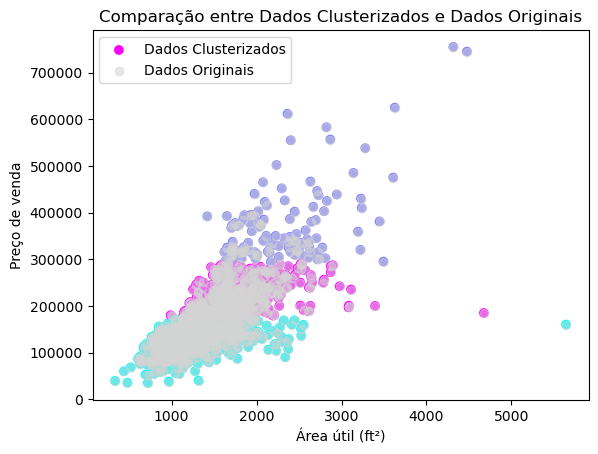

In [130]:
# Exibir os dados clusterizados
plt.scatter(df_cleaned_kmeans['GrLivArea'], df_cleaned_kmeans['SalePrice'], c=df_cleaned_kmeans['cluster'], cmap='cool', label='Dados Clusterizados')

# Exibir os dados originais
plt.scatter(data['GrLivArea'], data['SalePrice'], color='lightgray', alpha=0.5, label='Dados Originais')

# Definir os rótulos dos eixos
plt.xlabel('Área útil (ft²)')
plt.ylabel('Preço de venda')
plt.title('Comparação entre Dados Clusterizados e Dados Originais')

plt.legend()

# Mostrar o gráfico
plt.show()